## This code calculates the ratio of two organelles (chloroplast and mitochondria) to the total cell volume (generated in the ellipsoid volume notebook), plots and tests for signficance.

In [2]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked _by_ ‘.GlobalEnv’:

    extract_numeric




In [3]:
####
# cell volume data for normalization
####

# Read the data from the CSV file
data_cell <- read.csv("output_ratio_mito_chlor.csv")

# Filter the data: 
# 1. By a cutoff of 6.0 in the width column (reasonable limit on size of chlamy)
# 2. Where chlor_cell_ratio is less than or equal to 1 (>1 indicates poor signal from mitochondria which cell volume was generated from these masks)
filtered_output_ratio_mito_chloro <- data_cell %>%
  filter(width > 6.0 & chlor_cell_ratio <= 1)

# View the filtered data
View(filtered_output_ratio_mito_chloro)

# Optionally, you can save the filtered data to a new CSV file
write.csv(filtered_output_ratio_mito_chloro, file = "filtered_output_ratio_mito_chloro.csv", row.names = FALSE)

Filename,depth,height,width,species,volume,mito_volume,mito_cell_ratio,chlor_volume,chlor_cell_ratio
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
processed_Cr_TAP_2x-PK_mito_chloro_001_C3_BGSub.segmentation.tiff,9.1,2.460714,7.444046,cr,87.27908,11.71577,0.13423344,35.90070,0.41133225
processed_Cr_TAP_2x-PK_mito_chloro_002_C3_BGSub.segmentation.tiff,9.1,2.460714,7.444046,cr,87.27908,11.71577,0.13423344,35.90070,0.41133225
processed_Cr_TAP_2x-PK_mito_chloro_003_C3_BGSub.segmentation.tiff,9.1,8.821426,8.867855,cr,372.73263,62.86366,0.16865617,20.30540,0.05447713
processed_Cr_TAP_2x-PK_mito_chloro_006_C3_BGSub.segmentation.tiff,5.9,9.115474,11.034521,cr,310.73014,61.17993,0.19689089,92.70929,0.29835951
processed_Cr_TAP_2x-PK_mito_chloro_007_C3_BGSub.segmentation.tiff,7.1,9.177379,10.214283,cr,348.48455,54.43745,0.15621194,64.63270,0.18546790
processed_Cr_TAP_2x-PK_mito_chloro_008_C3_BGSub.segmentation.tiff,8.3,7.614284,8.542855,cr,282.68894,47.90618,0.16946607,47.45489,0.16786965
processed_Cr_TAP_2x-PK_mito_chloro_009_C3_BGSub.segmentation.tiff,8.7,9.811902,11.808331,cr,527.78810,93.06147,0.17632355,82.46961,0.15625516
processed_Cr_TAP_2x-PK_mito_chloro_010_C3_BGSub.segmentation.tiff,8.6,10.694045,9.130950,cr,439.69858,59.28034,0.13482040,84.35723,0.19185242
processed_Cr_TAP_2x-PK_mito_chloro_011_C3_BGSub.segmentation.tiff,7.4,8.744046,9.827379,cr,332.95109,38.17707,0.11466270,102.09636,0.30664071


In [4]:
####
# Step 2: check the summary statistics of the data
####

# Compute summary statistics for chlor_cell_ratio
summary_chlor <- filtered_output_ratio_mito_chloro %>%
  group_by(species) %>%
  summarise(
    count = n(),  # number of observations
    avg_chlor_cell_ratio = mean(chlor_cell_ratio, na.rm = TRUE)
  )

# Print summary statistics for chlor_cell_ratio to show the average ratio
print(summary_chlor)

# Assuming the column name for the mitochondria ratio is mito_cell_ratio (please adjust if different)
# Compute summary statistics for mito_cell_ratio
summary_mito <- filtered_output_ratio_mito_chloro %>%
  group_by(species) %>%
  summarise(
    count = n(),  # number of observations
    avg_mito_cell_ratio = mean(mito_cell_ratio, na.rm = TRUE)  # Adjust column name if different
  )

# Print summary statistics for mito_cell_ratio to show the average ratio
print(summary_mito)

# A tibble: 2 × 3
  species count avg_chlor_cell_ratio
  <chr>   <int>                <dbl>
1 cr         32                0.218
2 cs         32                0.398
# A tibble: 2 × 3
  species count avg_mito_cell_ratio
  <chr>   <int>               <dbl>
1 cr         32               0.153
2 cs         32               0.234


In [1]:
####
# Step 3: Plot the ratios by species
####

# Set custom colors for species
colors_species <- c(cr = "#73B5E3", cs = "#97CD78")

# Plot cell volume by species
volume_by_species <- ggplot(filtered_output_ratio_mito_chloro, aes(x = species, y = volume, fill = species)) +
  geom_violin(alpha = 0.7) +
  labs(title = "Cell Volume by Species",
       x = "Species",
       y = "Cell Volume") +
  theme_minimal() +
  scale_fill_manual(values = colors_species)

# Plot ratio of chloroplast volume to cell volume by species
chlor_plot_by_species <- ggplot(filtered_output_ratio_mito_chloro, aes(x = species, y = chlor_cell_ratio, fill = species)) +
  geom_violin(alpha = 0.7) +
  labs(title = "Ratio of Chloroplast Volume to Cell Volume by Species",
       x = "Species",
       y = "Chlor/Cell Volume") +
  theme_minimal() +
  scale_fill_manual(values = colors_species)

print(chlor_plot_by_species)

# Plot ratio of mitochondria volume to cell volume by species
mito_plot_by_species <- ggplot(filtered_output_ratio_mito_chloro, aes(x = species, y = mito_cell_ratio, fill = species)) +
  geom_violin(alpha = 0.7) +
  labs(title = "Ratio of Mitochondria Volume to Cell Volume by Species",
       x = "Species",
       y = "Mito/Cell Volume") +
  theme_minimal() +
  scale_fill_manual(values = colors_species)

print(mito_plot_by_species)

ERROR: Error in ggplot(filtered_output_ratio_mito_chloro, aes(x = species, y = volume, : could not find function "ggplot"


In [6]:
###
# Step 4: statistically compare the ratio data for each species
###

# Extract the chloroplast ratio data for each species
data_cr_chlor <- filtered_output_ratio_mito_chloro$chlor_cell_ratio[filtered_output_ratio_mito_chloro$species == "cr"]
data_cs_chlor <- filtered_output_ratio_mito_chloro$chlor_cell_ratio[filtered_output_ratio_mito_chloro$species == "cs"]

# Perform Wilcoxon rank-sum test
wilcox_test_result <- wilcox.test(data_cr_chlor, data_cs_chlor)

# Print the result
print(wilcox_test_result)

# Extract the mitochondria ratio data for each species
data_cr_mito <- filtered_output_ratio_mito_chloro$mito_cell_ratio[filtered_output_ratio_mito_chloro$species == "cr"]
data_cs_mito <- filtered_output_ratio_mito_chloro$mito_cell_ratio[filtered_output_ratio_mito_chloro$species == "cs"]

# Perform Wilcoxon rank-sum test
wilcox_test_result <- wilcox.test(data_cr_mito, data_cs_mito)

# Print the result
print(wilcox_test_result)

Warning message in wilcox.test.default(data_cr_chlor, data_cs_chlor):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data_cr_chlor and data_cs_chlor
W = 222, p-value = 0.0001014
alternative hypothesis: true location shift is not equal to 0



Warning message in wilcox.test.default(data_cr_mito, data_cs_mito):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  data_cr_mito and data_cs_mito
W = 211, p-value = 5.461e-05
alternative hypothesis: true location shift is not equal to 0



### A final plot to show all 4 datasets

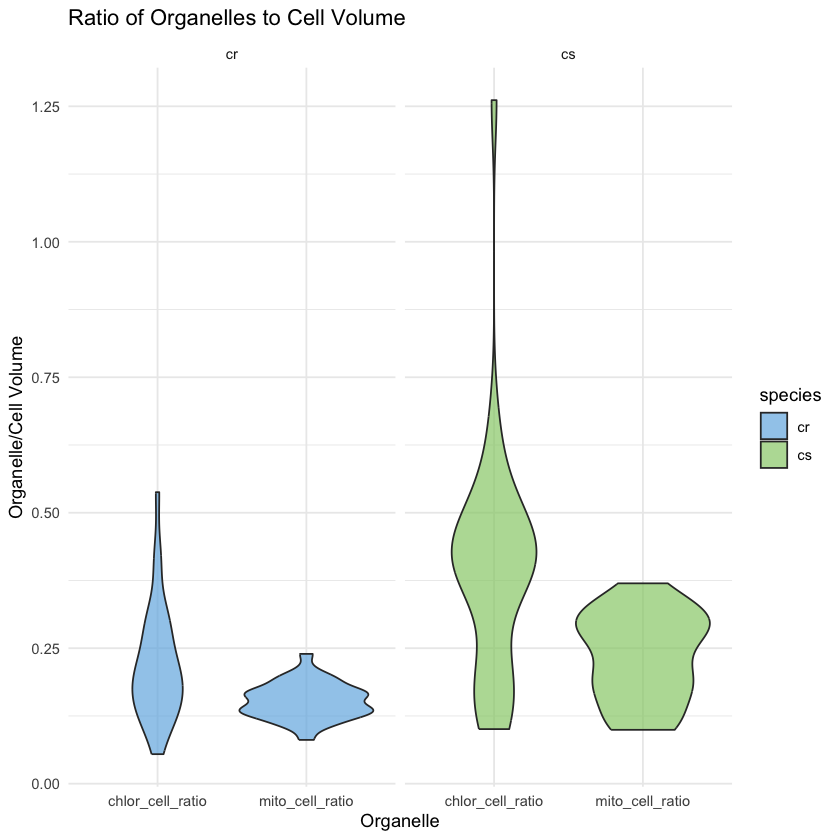

In [7]:
# Convert the data to a long format
long_data <- filtered_output_ratio_mito_chloro %>%
  pivot_longer(cols = c(chlor_cell_ratio, mito_cell_ratio),
               names_to = "ratios",
               values_to = "organelle_cell_ratio")

# Set custom colors for species
colors_species <- c(cr = "#73B5E3", cs = "#97CD78")

# Plot the difference in ratios for each species
cr_ratios <- ggplot(long_data, aes(x = ratios, y = organelle_cell_ratio, fill = species)) +
  geom_violin(alpha = 0.7) +
  labs(title = "Ratio of Organelles to Cell Volume",
       x = "Organelle",
       y = "Organelle/Cell Volume") +
  theme_minimal() +
  facet_wrap(~ species, scales = "free_x") +   # Create a separate plot for each species
  scale_fill_manual(values = colors_species)

print(cr_ratios)

In [2]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Monterey 12.5.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/Los_Angeles
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.33   IRdisplay_1.1   utf8_1.2.3      base64enc_0.1-3
 [5] fastmap_1.1.1   glue_1.6.2      htmltools_0.5.6 repr_1.1.6     
 [9] lifecycle_1.0.3 cli_3.6.1       fansi_1.0.4     vctrs_0.6.3    
[13] pbdZMQ_0.3-10   compiler_4.3.1  tools_4.3.1     evaluate_0.21  
[17] pillar_1.9.0    crayon_1.5.2    rlang_1.1.1     jsonlite_1.8.7 
[21] IRkernel_1.3.2  uuid_1.1-1     